In [1]:
# All imports should be in first cell
import cartopy
import GMesh
import importlib
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reload the GMesh tool (in case you change something in the tool and want it to take effect in this notebook)
importlib.reload(GMesh)

<module 'GMesh' from '/local2/home/GitHub/thin-wall-topography/python/GMesh.py'>

# Create target grids using various longitude ranges

Use ranges 180$^\circ$W--180$^\circ$E and 0$^\circ$E--360$^\circ$E.

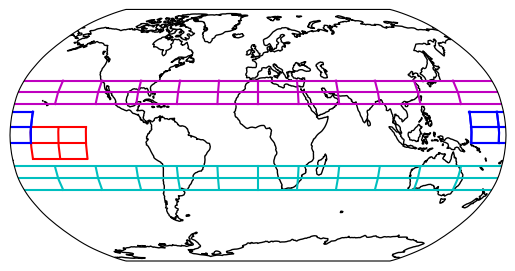

In [3]:
target_mesh_1 = GMesh.GMesh( lon=np.linspace(-165, -125, 3), lat=np.linspace(-15, 5, 3) )
target_mesh_2 = GMesh.GMesh( lon=np.linspace(155, 195, 3), lat=np.linspace(-5, 15, 3) )
target_mesh_2p = GMesh.GMesh( lon=np.linspace(155-360, 195-360, 3), lat=np.linspace(-5, 15, 3) )
target_mesh_3 = GMesh.GMesh( lon=np.linspace(0, 360, 13), lat=np.linspace(20, 35, 3) )
target_mesh_4 = GMesh.GMesh( lon=np.linspace(-180, 180, 13), lat=np.linspace(-35, -20, 3) )
ax = plt.subplot(111, projection=cartopy.crs.Robinson(central_longitude=0))
ax.plot([-180,180,0,0],[0,0,-90,90],'w.',transform=cartopy.crs.PlateCarree()) # Force full globe
ax.coastlines()
target_mesh_1.plot(ax, linecolor='r', transform=cartopy.crs.PlateCarree())
target_mesh_2.plot(ax, linecolor='b', transform=cartopy.crs.PlateCarree())
target_mesh_2p.plot(ax, linecolor='b', transform=cartopy.crs.PlateCarree())
target_mesh_3.plot(ax, linecolor='m', transform=cartopy.crs.PlateCarree()) # Global 0 .. 360
target_mesh_4.plot(ax, linecolor='c', transform=cartopy.crs.PlateCarree()) # Global -180 .. 180

# Fake datasets in various longitude ranges

Datasets tend to use cell-center constructs

In [4]:
dataset_1 = GMesh.UniformEDS(np.linspace(-175,175,36), np.linspace(-80,80,9), np.zeros((9,36))) # -180 .. 180
dataset_2 = GMesh.UniformEDS(np.linspace(5,355,36), np.linspace(-80,80,9), np.zeros((9,36))) # 0 .. 360
# dataset_3 = GMesh.UniformEDS(np.linspace(10,50,5), np.linspace(-10,20,4), np.zeros((4,5))) # regional
# dataset_1, dataset_2, dataset_3
dataset_1, dataset_2

(<UniformEDS 36 x 9 (0.000Gb)
 lon = <RegularCoord n=36, dx=10.0, rdx=0.1, x0=-180.0, io=-18, rem=0.0, is-ie=0-36, periodic=True>
 h:[-175. -165. -155. -145. -135. -125. -115. -105.  -95.  -85.  -75.  -65.
   -55.  -45.  -35.  -25.  -15.   -5.    5.   15.   25.   35.   45.   55.
    65.   75.   85.   95.  105.  115.  125.  135.  145.  155.  165.  175.]
 q:[-180. -170. -160. -150. -140. -130. -120. -110. -100.  -90.  -80.  -70.
   -60.  -50.  -40.  -30.  -20.  -10.    0.   10.   20.   30.   40.   50.
    60.   70.   80.   90.  100.  110.  120.  130.  140.  150.  160.  170.
   180.]
 lat = <RegularCoord n=9, dx=20.0, rdx=0.05, x0=-90, io=-5, rem=0.5, is-ie=0-9, periodic=False>
 h:[-80. -60. -40. -20.   0.  20.  40.  60.  80.]
 q:[-90. -70. -50. -30. -10.  10.  30.  50.  70.  90.]
 data = (9, 36)>,
 <UniformEDS 36 x 9 (0.000Gb)
 lon = <RegularCoord n=36, dx=10.0, rdx=0.1, x0=0.0, io=0, rem=0.0, is-ie=0-36, periodic=True>
 h:[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125.

Find indexes of "mesh" within dataset.

(array([2, 4]), array([3, 4]))

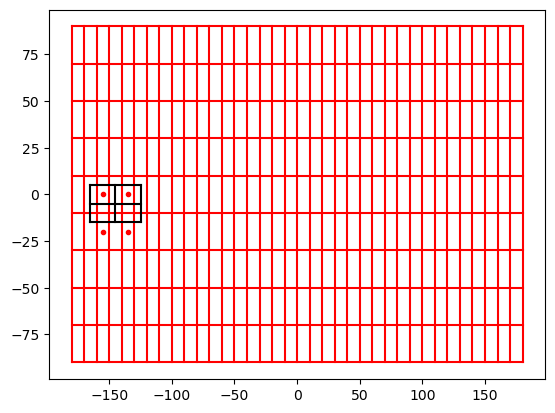

In [5]:
dataset, target_mesh = dataset_1, target_mesh_1
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([16, 18]), array([4, 5]))

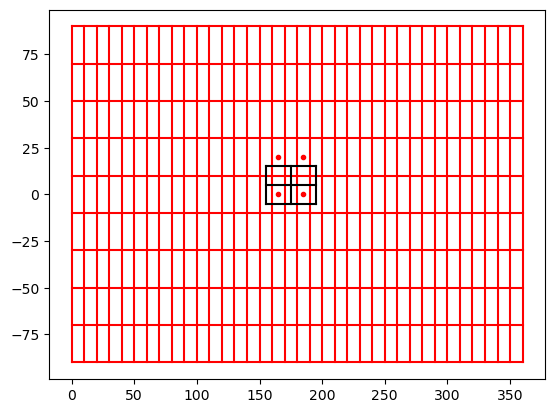

In [6]:
dataset, target_mesh = dataset_2, target_mesh_2
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([34,  0]), array([4, 5]))

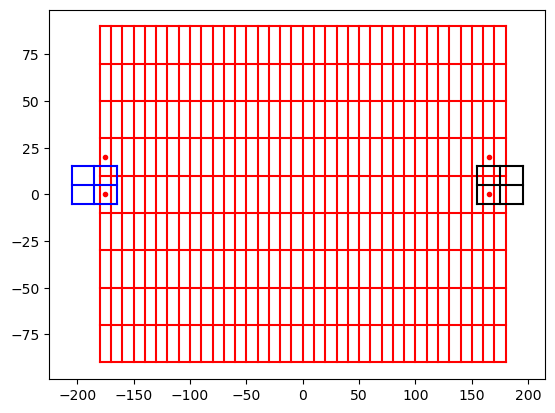

In [7]:
dataset, target_mesh = dataset_1, target_mesh_2
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
target_mesh_2p.plot(ax, linecolor='b')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([16, 18]), array([4, 5]))

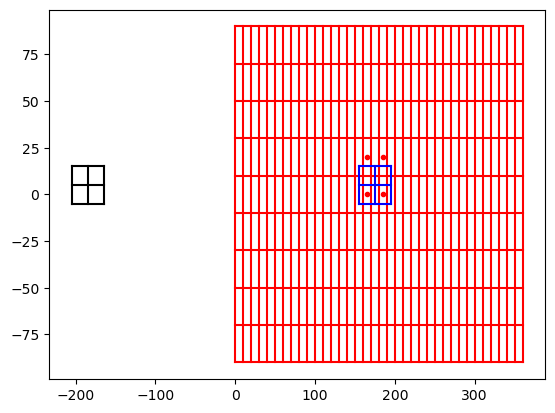

In [8]:
dataset, target_mesh = dataset_2, target_mesh_2p
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
target_mesh_2.plot(ax, linecolor='b')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([19, 22, 25, 28, 31, 34,  1,  4,  7, 10, 13, 16]), array([5, 6]))

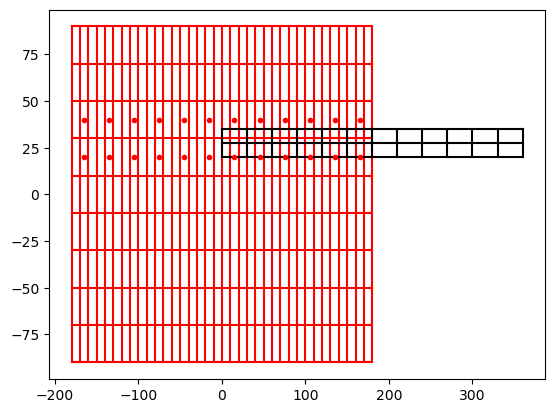

In [9]:
dataset, target_mesh = dataset_1, target_mesh_3
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]), array([5, 6]))

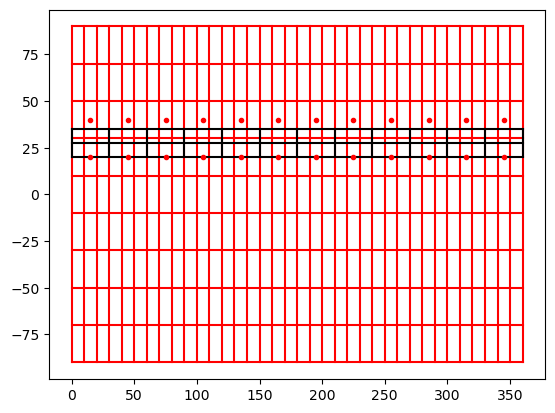

In [10]:
dataset, target_mesh = dataset_2, target_mesh_3
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset, use_center=True )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]), array([2, 3]))

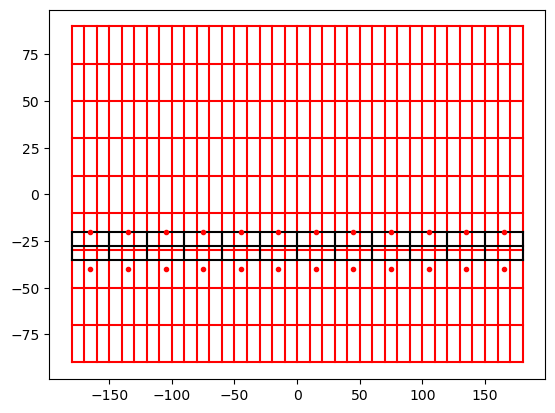

In [11]:
dataset, target_mesh = dataset_1, target_mesh_4
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]

(array([19, 22, 25, 28, 31, 34,  1,  4,  7, 10, 13, 16]), array([2, 3]))

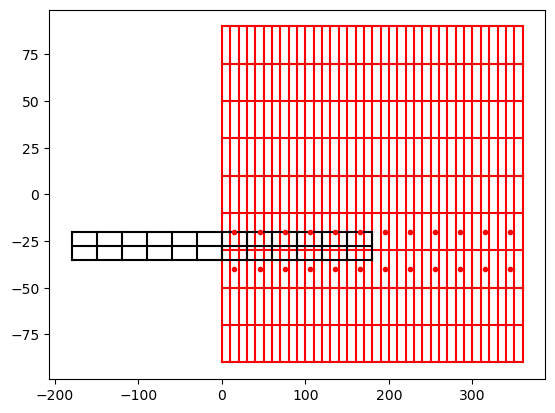

In [12]:
dataset, target_mesh = dataset_2, target_mesh_4
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset.lonh, lat=dataset.lath, from_cell_center=True).plot(ax, linecolor='r') # Mesh for dataset
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset.lonh[i1], dataset.lath[j1], 'r.') # Dataset cells hit by `target_mesh.find_nn_uniform_source( dataset )`
i1[0],j1[:,0]